<a href="https://colab.research.google.com/github/JennEYoon/ECG-transform/blob/main/notebooks/load_mat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading .mat data files, MATLAB format in Python  
Jennifer Yoon  
Feb 4, 2025 Tuesday 7:30pm start   

Manually upload a small fraction of data files from "g1" folder, from CinC 2020 Challenge  
***PTB XL dataset***.  

Total 21,837 files (HR00,001 .. HR21,837)  
folders g1 .. g22  
about 1,000 files per folder  
data in .mat, header info in .hea  
Each file has 12-leads (rows?) in same order (I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5, V6)  

In [ ]:
!pwd

/content


In [ ]:
!ls -h

HR00001.hea  HR00002.mat  HR00004.hea  HR00005.mat  HR00007.hea  HR00008.mat  HR00010.hea
HR00001.mat  HR00003.hea  HR00004.mat  HR00006.hea  HR00007.mat  HR00009.hea  HR00010.mat
HR00002.hea  HR00003.mat  HR00005.hea  HR00006.mat  HR00008.hea  HR00009.mat  sample_data


In [ ]:
import scipy.io
import numpy as np

print(scipy.__version__)
print(np.__version__)

1.13.1
1.26.4


### Session with ChatGPT o1-mini:  
MATLAB .mat files often contain structure arrays, which are stored as ***numpy.ndarray*** objects containing **scipy.io.matlab**.mio5_params.mat_struct objects. To properly access them in Python, you need to convert them into dictionaries for easier manipulation.

#### Example: Loading and Accessing a Struct Array  
```python
import scipy.io
import numpy as np

# Load the .mat file
mat_data = scipy.io.loadmat('filename.mat', struct_as_record=False, squeeze_me=True)

# Check the keys in the loaded data
print(mat_data.keys())

# Access the struct (assuming the variable is named 'myStruct')
my_struct = mat_data['myStruct']

# Check fields in the struct
print(dir(my_struct))  # Shows the attributes of the struct

# Access a specific field (e.g., 'field1')
print(my_struct.field1)
```
Explanation:  
 * squeeze_me=True removes unnecessary nesting (like single-element arrays).  
 * struct_as_record=False ensures MATLAB structs are loaded as objects.  
 * The mat_struct_to_dict function recursively converts struct arrays into Python dictionaries for easy access.  

In [ ]:
filename = "HR00001.mat"

# Load the .mat file
mat_data = scipy.io.loadmat(filename, struct_as_record=False, squeeze_me=True)
print(mat_data, type(mat_data))

# Check the keys in the loaded data
print(mat_data.keys())  # only one key, 'val'.

# Access the struct (assuming the variable is named 'myStruct')
data = mat_data['val']

# Show elements of data (ndarray type)
print('first 5 elements: \n', data[:5])
print('length of row 0:', len(data[0]))

{'val': array([[-115, -115, -115, ...,  210,  210,  210],
       [ -50,  -50,  -50, ...,  205,  205,  205],
       [  65,   65,   65, ...,   -5,   -5,   -5],
       ...,
       [ -35,  -35,  -35, ...,  185,  185,  185],
       [ -35,  -35,  -35, ...,  170,  170,  170],
       [ -75,  -75,  -75, ...,  180,  180,  180]], dtype=int16)} <class 'dict'>
dict_keys(['val'])
first 5 elements: 
 [[-115 -115 -115 ...  210  210  210]
 [ -50  -50  -50 ...  205  205  205]
 [  65   65   65 ...   -5   -5   -5]
 [  82   82   82 ... -207 -207 -207]
 [ -90  -90  -90 ...  107  107  107]]
length of row 0: 5000


In [ ]:
data.shape, type(data)

((12, 5000), numpy.ndarray)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__version__)

3.10.0


### ChatGPT o1-mini session:  
```python
import numpy as np
import matplotlib.pyplot as plt

# Simulated data: 12 rows, 5000 columns
data = np.random.randn(12, 5000)  # Replace with your actual data

# Downsample by taking every 4th sample (since 125 Hz is 1/4 of 500 Hz)
downsampled_data = data[:, ::4]  # Now shape (12, 1250)

# Time axis (assuming 500 Hz for 5000 samples, now adjusted for 125 Hz)
time_original = np.arange(5000) / 500  # Original time axis (seconds)
time_downsampled = np.arange(1250) / 125  # Downsampled time axis

# Plot all 12 signals
plt.figure(figsize=(12, 8))

for i in range(12):
    plt.plot(time_downsampled, downsampled_data[i] + i * 5, label=f"Signal {i+1}")  
    # Offset each signal for clarity

plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Downsampled Signals (125 Hz)")
plt.legend()
plt.show()
```

In [ ]:
# data defined above, ndarray shape (12, 5000), sampled at 500 hertz, 12 rows are ECG leads

# Downsample by taking every 4th sample (since 125 Hz is 1/4 of 500 Hz)
downsampled_data = data[:, ::4]  # Now shape (12, 1250)
print(downsampled_data.shape)

(12, 1250)


In [32]:
# Time axis (assuming 500 Hz for 5000 samples, now adjusted for 125 Hz)
# time_original = np.arange(5000) / 500  # Original time axis (seconds)
time_downsampled = np.arange(1250) / 125  # Downsampled time axis
print([f"{x:.3f}" for x in time_downsampled])

['0.000', '0.008', '0.016', '0.024', '0.032', '0.040', '0.048', '0.056', '0.064', '0.072', '0.080', '0.088', '0.096', '0.104', '0.112', '0.120', '0.128', '0.136', '0.144', '0.152', '0.160', '0.168', '0.176', '0.184', '0.192', '0.200', '0.208', '0.216', '0.224', '0.232', '0.240', '0.248', '0.256', '0.264', '0.272', '0.280', '0.288', '0.296', '0.304', '0.312', '0.320', '0.328', '0.336', '0.344', '0.352', '0.360', '0.368', '0.376', '0.384', '0.392', '0.400', '0.408', '0.416', '0.424', '0.432', '0.440', '0.448', '0.456', '0.464', '0.472', '0.480', '0.488', '0.496', '0.504', '0.512', '0.520', '0.528', '0.536', '0.544', '0.552', '0.560', '0.568', '0.576', '0.584', '0.592', '0.600', '0.608', '0.616', '0.624', '0.632', '0.640', '0.648', '0.656', '0.664', '0.672', '0.680', '0.688', '0.696', '0.704', '0.712', '0.720', '0.728', '0.736', '0.744', '0.752', '0.760', '0.768', '0.776', '0.784', '0.792', '0.800', '0.808', '0.816', '0.824', '0.832', '0.840', '0.848', '0.856', '0.864', '0.872', '0.880', 

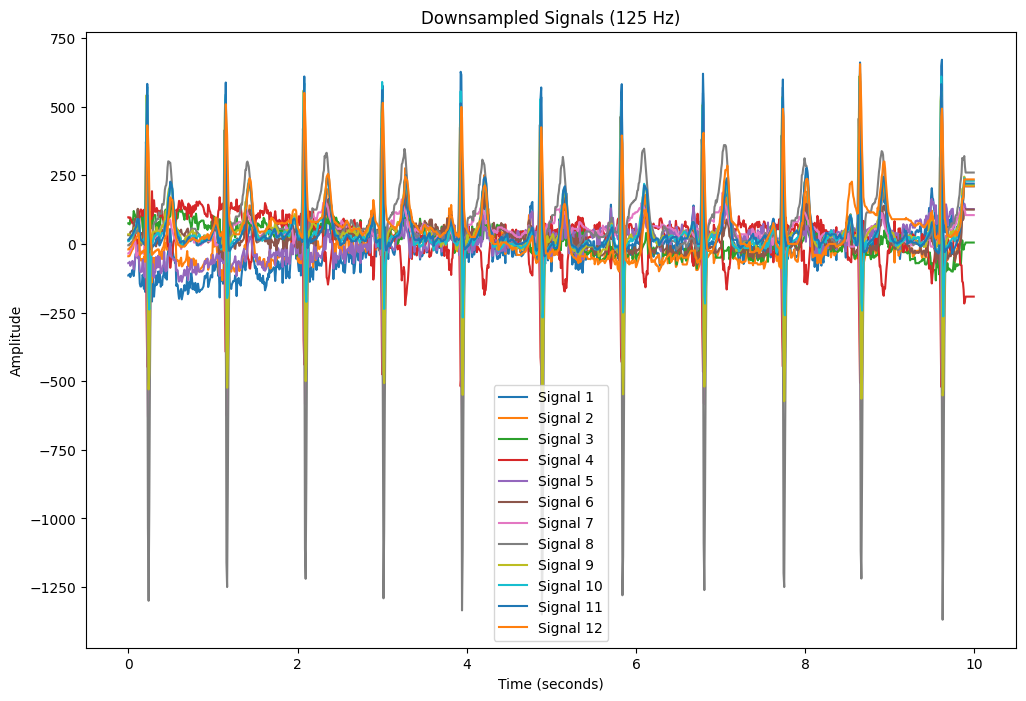

In [ ]:
# Plot all 12 signals
plt.figure(figsize=(12, 8))

for i in range(12):
    plt.plot(time_downsampled, downsampled_data[i] + i * 5, label=f"Signal {i+1}")
    # Offset each signal for clarity

plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Downsampled Signals (125 Hz)")
plt.legend()
plt.show()